<a href="https://colab.research.google.com/github/tamer017/ML-Assessments/blob/master/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 

Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from operator import itemgetter
%matplotlib inline

In [2]:
plt.figure(figsize=(16,8))
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km = [], num_clusters = 0):
    color = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan","yellow","black","lime","magenta"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c = color[0], alpha = alpha, s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], c = color[i], alpha = alpha, s = s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c = color[i], marker = 'x', s = 100)

<Figure size 1152x576 with 0 Axes>

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



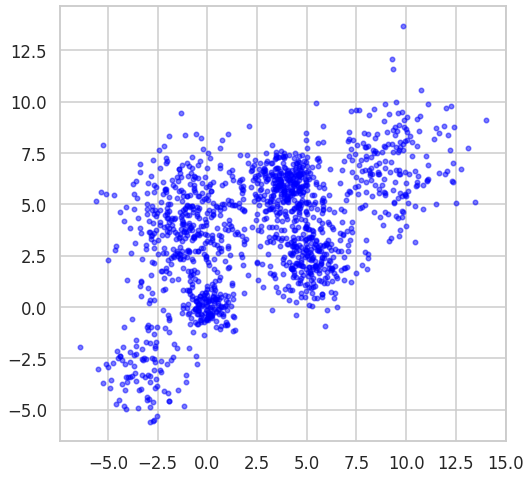

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

For 2 clusters, the average silhouette_score is : 0.4751544541991239 and the destortion function is : 16716.697637160847


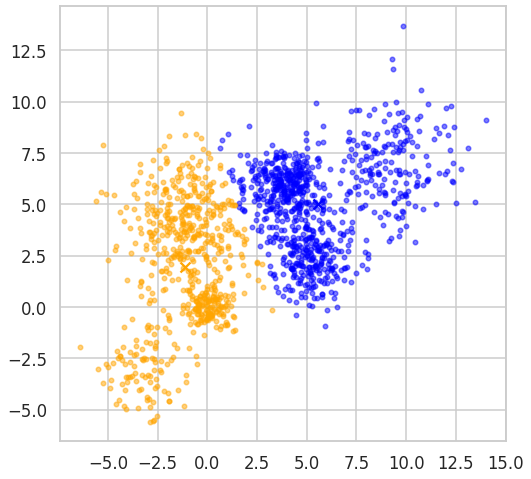

For 3 clusters, the average silhouette_score is : 0.43631793714185435 and the destortion function is : 12094.797074229678


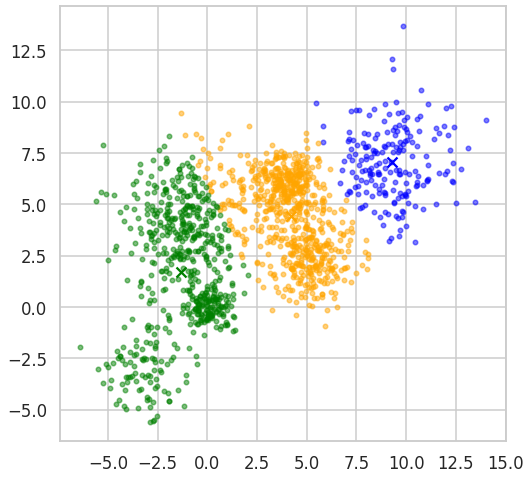

For 4 clusters, the average silhouette_score is : 0.4628725400351352 and the destortion function is : 7812.075861193691


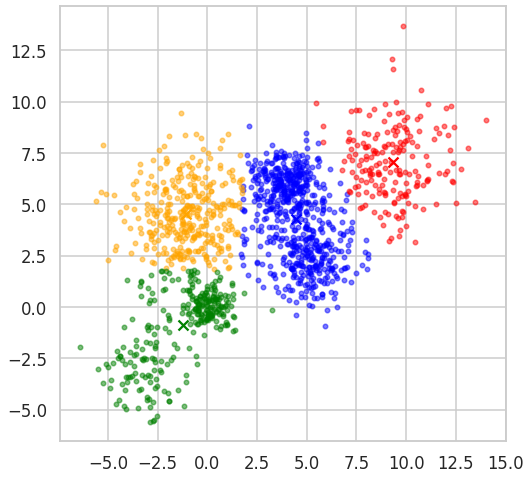

For 5 clusters, the average silhouette_score is : 0.48092962827116337 and the destortion function is : 5600.242468842139


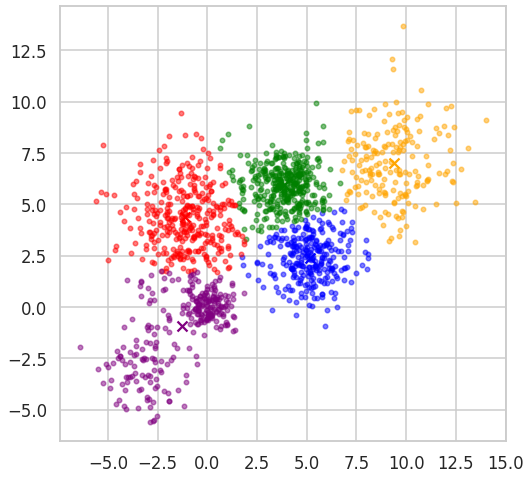

For 6 clusters, the average silhouette_score is : 0.4859737366910219 and the destortion function is : 4310.2969047067745


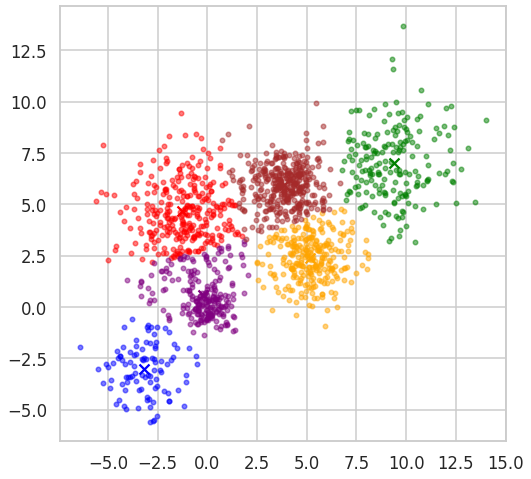

For 7 clusters, the average silhouette_score is : 0.46340972197949165 and the destortion function is : 3811.1633360756578


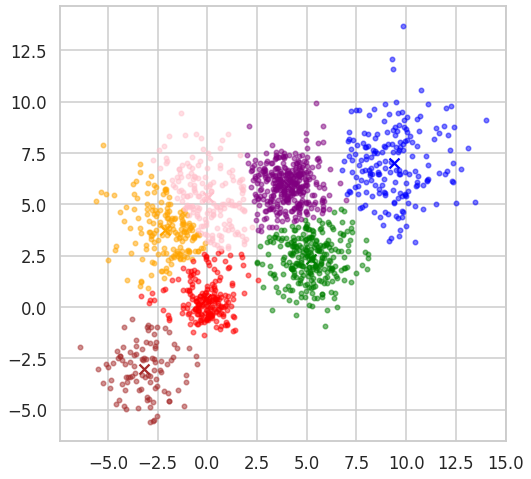

For 8 clusters, the average silhouette_score is : 0.44444125173642235 and the destortion function is : 3445.5883069696956


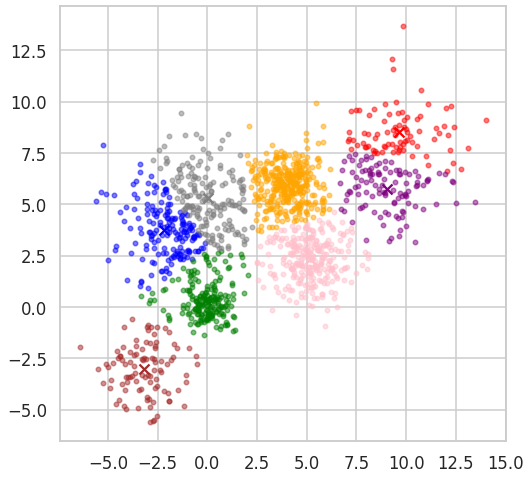

For 9 clusters, the average silhouette_score is : 0.4523290230370172 and the destortion function is : 3086.12557152911


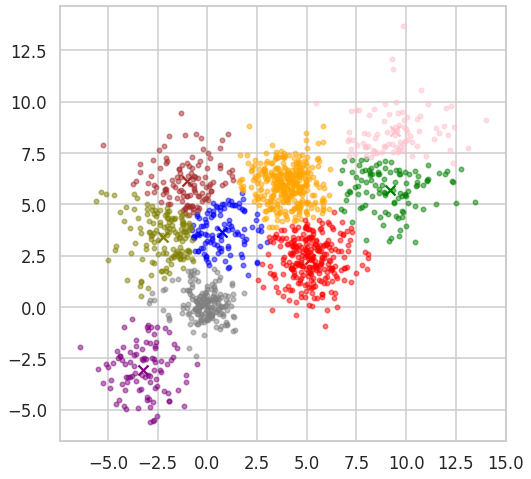

For 10 clusters, the average silhouette_score is : 0.39616102145496074 and the destortion function is : 2828.8551089089833


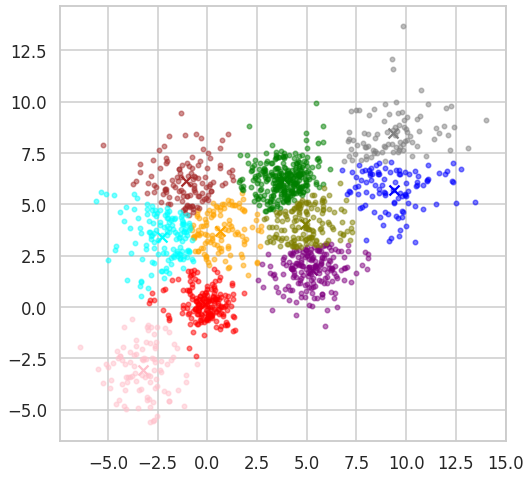

For 11 clusters, the average silhouette_score is : 0.3929494891400752 and the destortion function is : 2630.2594007713774


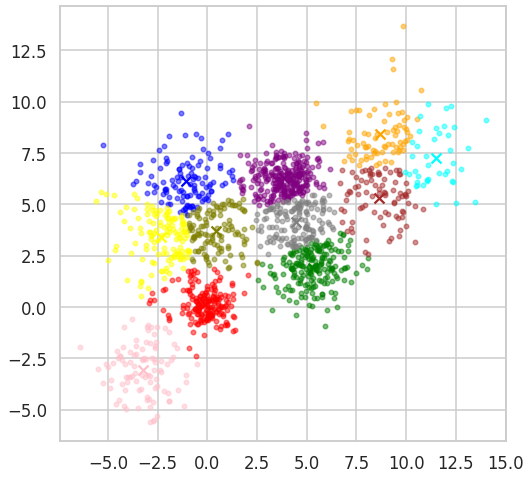

For 12 clusters, the average silhouette_score is : 0.3804484544117441 and the destortion function is : 2459.776426607107


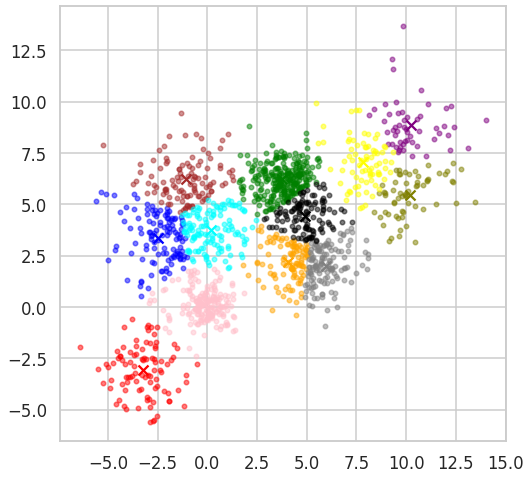

For 13 clusters, the average silhouette_score is : 0.36532845991632756 and the destortion function is : 2275.5123281079964


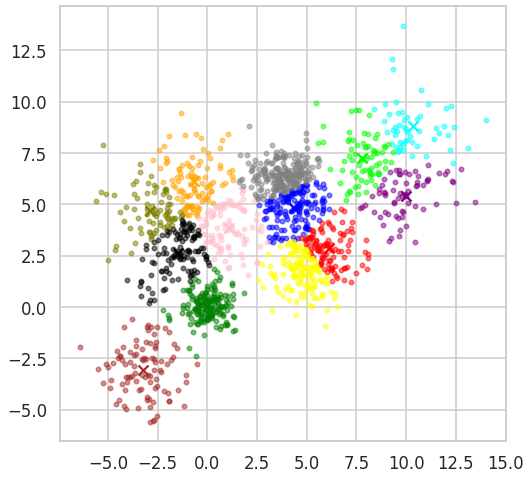

For 14 clusters, the average silhouette_score is : 0.37223030342727836 and the destortion function is : 2105.5170982725786


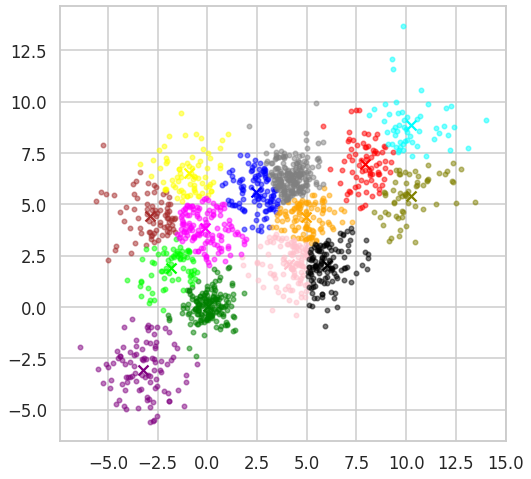

In [4]:
distortion_functions = []
silhouette_scores = []
min_clusters = 2
max_clusters = 14
for n_clusters in range(min_clusters, max_clusters+1):
    Kmean = KMeans(n_clusters = n_clusters)
    Kmean.fit(Multi_blob_Data)
    display_cluster(Multi_blob_Data, km = Kmean, num_clusters = n_clusters)
    distortion_function = Kmean.inertia_ 
    distortion_functions.append(distortion_function) 
    silhouette_scoree = silhouette_score(Multi_blob_Data, Kmean.labels_)
    silhouette_scores.append(silhouette_scoree)
    print("For", n_clusters, "clusters,", "the average silhouette_score is :", silhouette_scoree, "and the destortion function is :", distortion_function)
    plt.show()

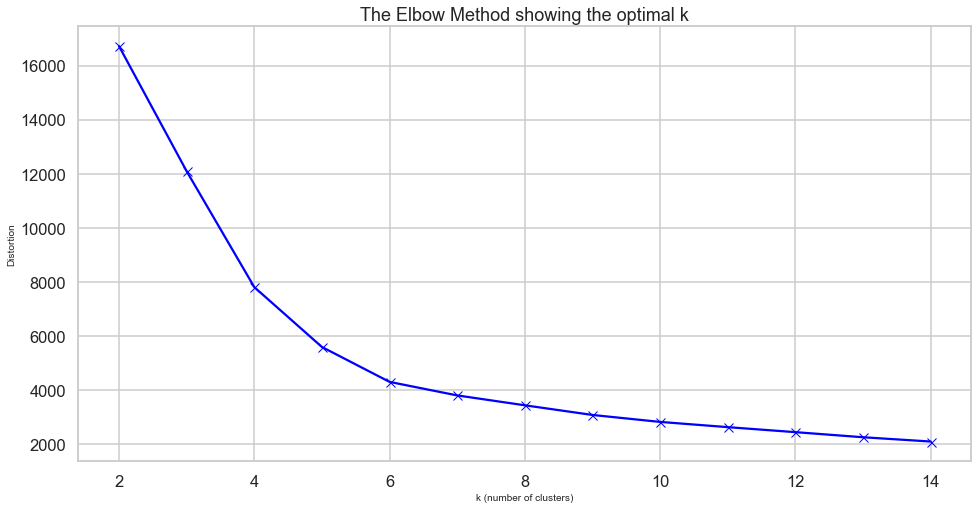

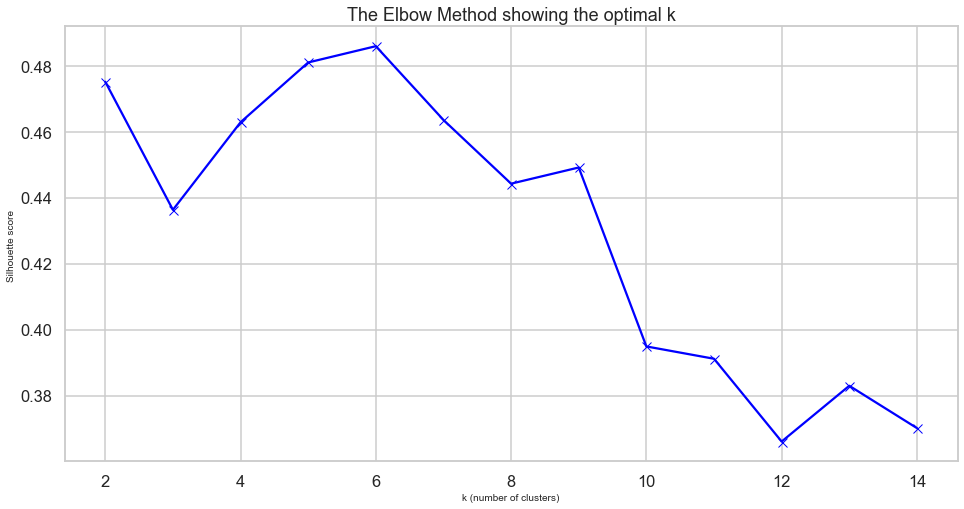

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(list(range(min_clusters,max_clusters+1)), distortion_functions, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
plt.figure(figsize=(16,8))
plt.plot(list(range(min_clusters,max_clusters+1)), silhouette_scores, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette score ')
plt.title('The Elbow Method showing the optimal k')
plt.show()
index, element = max(enumerate(silhouette_scores), key=itemgetter(1))
max_silhouette_score_kmean = {"n_clusters":index+2,"silhouette_score":element}

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 